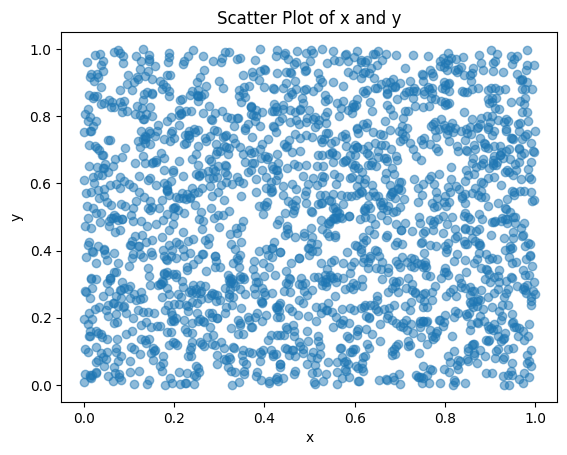

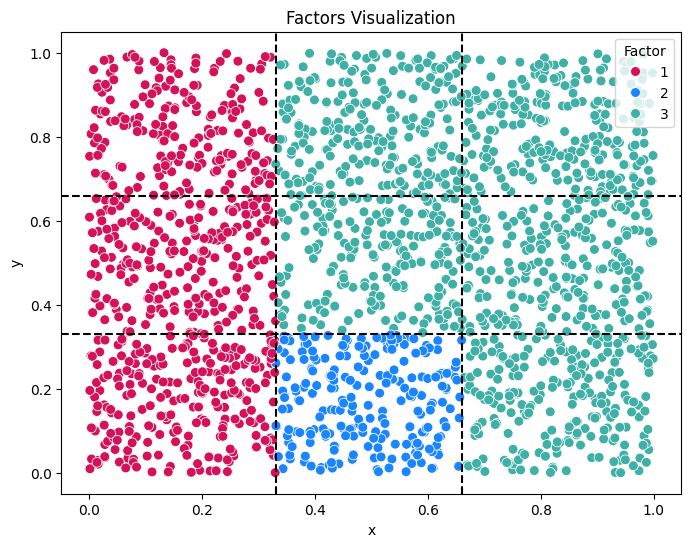

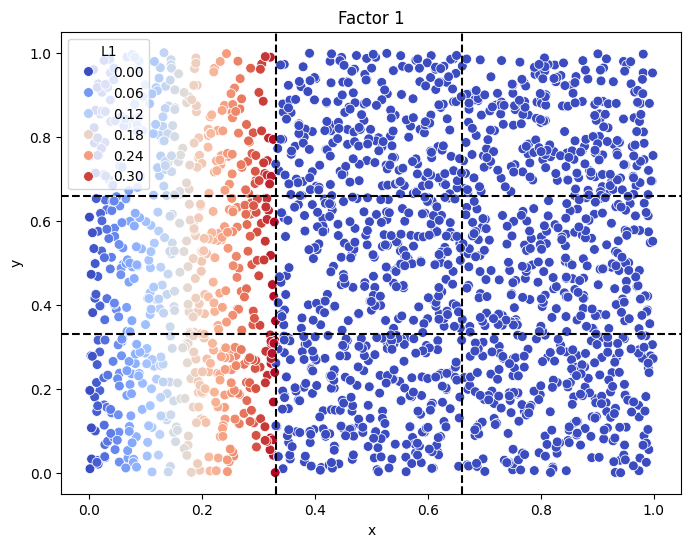

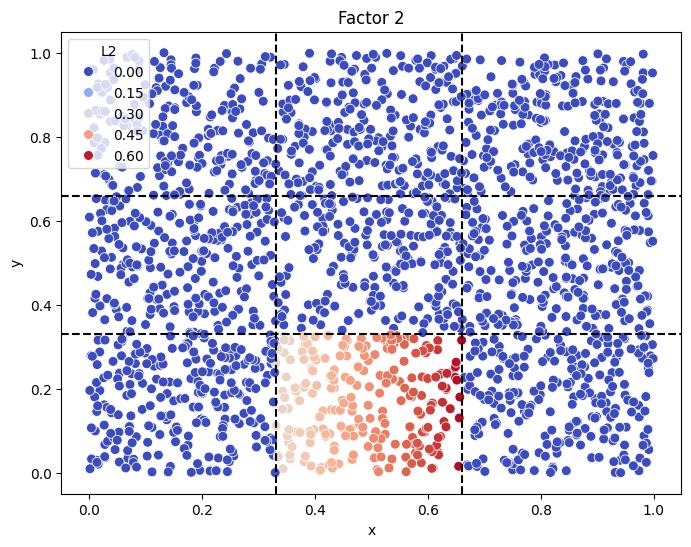

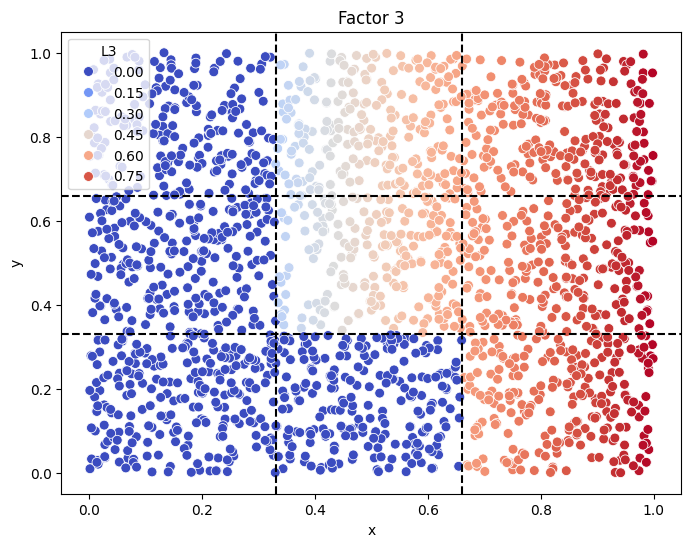

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(1)

# Generate random uniform data
x = np.random.uniform(size=2000)
y = np.random.uniform(size=2000)
X = np.column_stack((x, y))

# Plot the scatter plot of x and y
plt.scatter(x, y, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x and y")
plt.show()

# Generate matrix f
f = np.empty((3, 200))
for i in range(f.shape[1]):
    t1 = np.random.choice([0, 1], size=1)[0]
    t2 = np.random.choice([0, 1], size=1)[0]
    f[0, i] = t1 * np.random.randn()
    f[1, i] = t2 * np.random.randn()
    f[2, i] = t2 * np.random.randn()

# Initialize matrix L and factor array
L = np.empty((len(x), 3))
factor = []

# Populate L and factor arrays
for i in range(len(x)):
    if (x[i] < 0.33  )  :
        L[i, :] = [np.sin  (x[i]), 0, 0]
        factor.append(1)
    elif   (0.33 < x[i] < 0.66 and y[i] < 0.33) :
        L[i, :] = [0, np.sin  (x[i]), 0]
        factor.append(2)
    else:
        L[i, :] = [0, 0,np.sin  (x[i])]
        factor.append(3)

# Convert to DataFrame
df = pd.DataFrame({"x": x, "y": y, "Factor": factor})

# Colors for the plot
colors = ["#D41159", "#1A85FF", "#40B0A6"]

# Plot factor visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette=colors, s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()

# Create individual factor plots
for i in range(3):
    df[f"L{i+1}"] = L[:, i]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x="x",
        y="y",
        hue=f"L{i+1}",
        palette="coolwarm",
        s=50
    )
    plt.axhline(0.33, color="black", linestyle="--")
    plt.axhline(0.66, color="black", linestyle="--")
    plt.axvline(0.33, color="black", linestyle="--")
    plt.axvline(0.66, color="black", linestyle="--")
    plt.title(f"Factor {i+1}") 
    plt.show()

# Generate Z matrix
Z = L @ f + np.random.randn(L.shape[0], f.shape[1])  *0.5


In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
ebmf= cEBMF(data= np.array(Z),
               prior_L= "point_Laplace",
                 prior_F= "point_Laplace", K=3)

In [4]:
ebmf.init_LF()
for i in range(50):
    ebmf.iter()

The array does not contain any missing values.
Initializing latent factors using SVD.


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:112: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(lm2 - lm1))


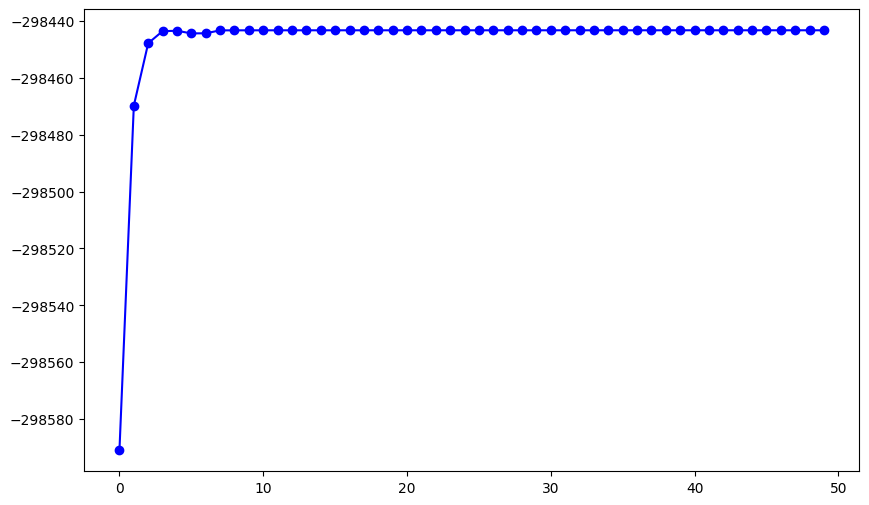

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(ebmf.obj)[1:], marker='o', linestyle='-', color='b')

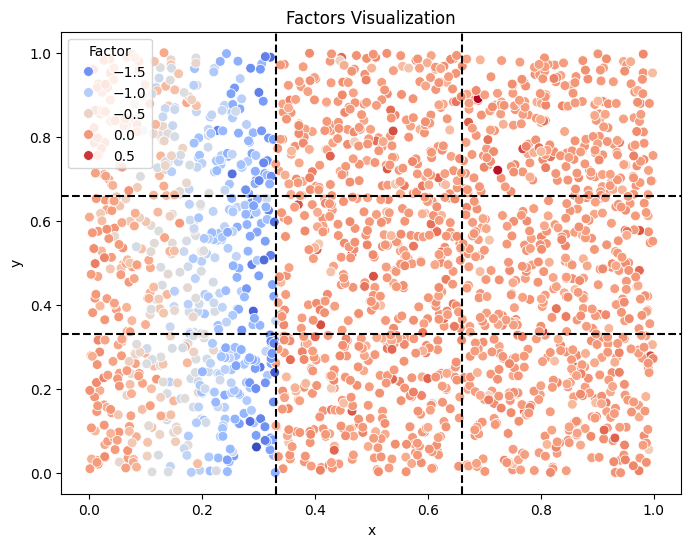

In [6]:

df = pd.DataFrame({"x": x, "y": y, "Factor":ebmf.L[:,2]})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette="coolwarm", s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()


In [7]:
mycebmf= cEBMF(data= np.array(Z), K=3,
               prior_L= "emdn",
               X_l=X )
mycebmf.init_LF()
for i in range(30):
    mycebmf.iter()

The array does not contain any missing values.
Initializing latent factors using SVD.
Epoch 10/20, Loss: 0.9047
Epoch 20/20, Loss: 0.8223
Epoch 10/20, Loss: 0.8191
Epoch 20/20, Loss: 0.7746
Epoch 10/20, Loss: 0.8462
Epoch 20/20, Loss: 0.8119
Epoch 10/20, Loss: 0.7771
Epoch 20/20, Loss: 0.7804
Epoch 10/20, Loss: 0.7324
Epoch 20/20, Loss: 0.7131
Epoch 10/20, Loss: 0.8021
Epoch 20/20, Loss: 0.7761
Epoch 10/20, Loss: 0.7771
Epoch 20/20, Loss: 0.7710
Epoch 10/20, Loss: 0.6893
Epoch 20/20, Loss: 0.6906
Epoch 10/20, Loss: 0.7141
Epoch 20/20, Loss: 0.7083
Epoch 10/20, Loss: 0.7875
Epoch 20/20, Loss: 0.7760
Epoch 10/20, Loss: 0.6579
Epoch 20/20, Loss: 0.6603
Epoch 10/20, Loss: 0.7349
Epoch 20/20, Loss: 0.7566
Epoch 10/20, Loss: 0.7942
Epoch 20/20, Loss: 0.7836
Epoch 10/20, Loss: 0.6467
Epoch 20/20, Loss: 0.6437
Epoch 10/20, Loss: 0.7465
Epoch 20/20, Loss: 0.7397
Epoch 10/20, Loss: 0.7645
Epoch 20/20, Loss: 0.7725
Epoch 10/20, Loss: 0.6324
Epoch 20/20, Loss: 0.6328
Epoch 10/20, Loss: 0.6316
Epoc

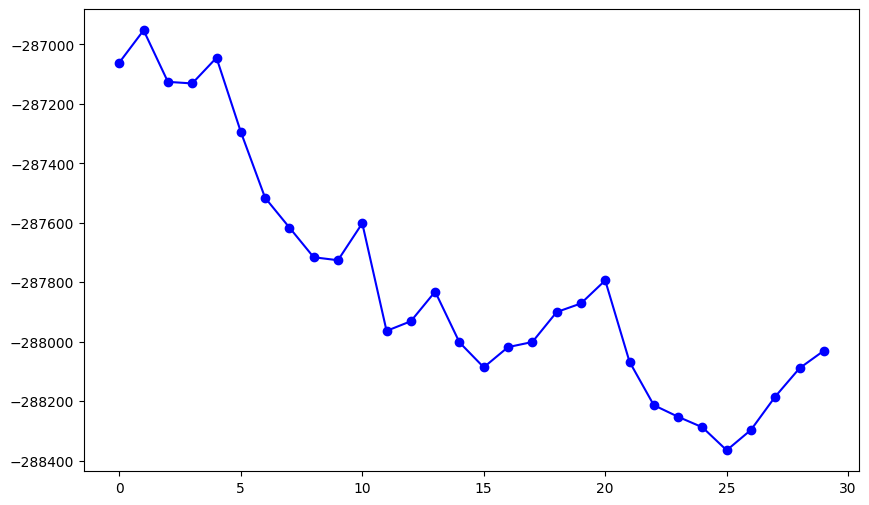

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

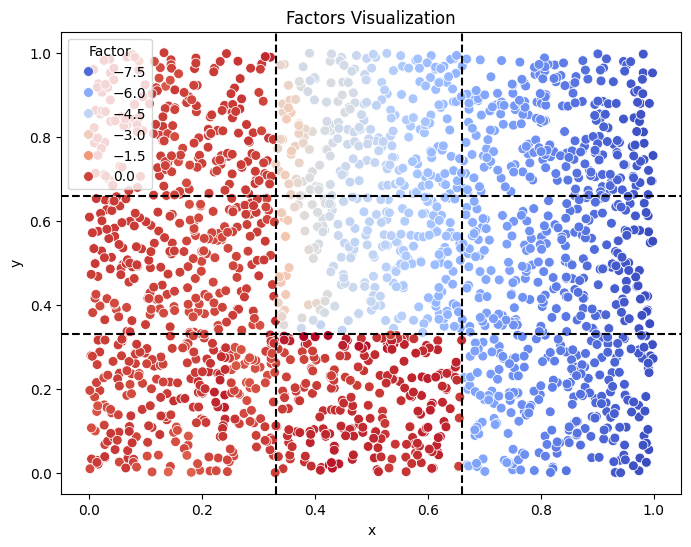

In [9]:

df = pd.DataFrame({"x": x, "y": y, "Factor":mycebmf.L[:,0]})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette="coolwarm", s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()


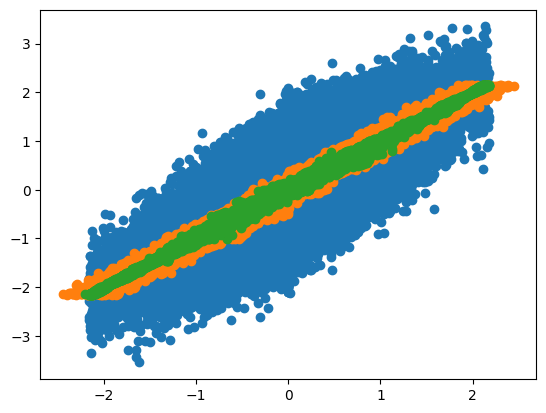

In [10]:
plt.scatter(mycebmf.Y_fit, Z)
 

plt.scatter(ebmf.Y_fit,L @ f )  

plt.scatter(mycebmf.Y_fit,L @ f )  

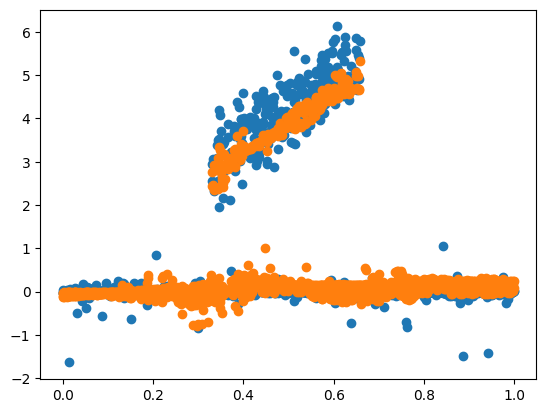

In [11]:

plt.scatter(x, ebmf.L[:,1]) 
plt.scatter(x,mycebmf.L[:,1]) 

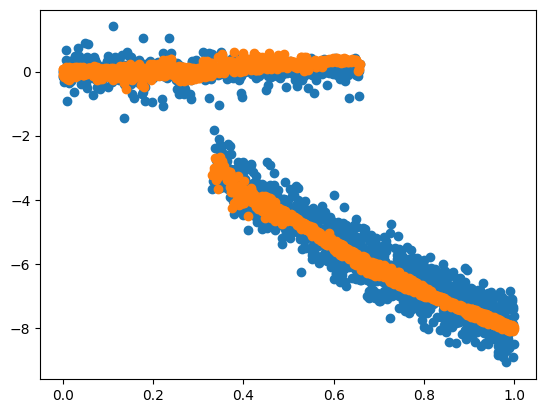

In [12]:

plt.scatter(x, ebmf.L[:,0]) 
plt.scatter(x,mycebmf.L[:,0]) 

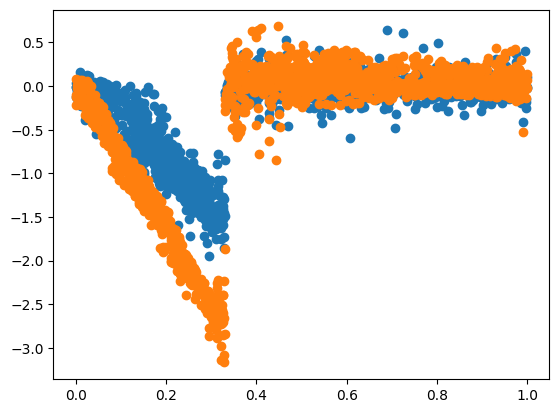

In [13]:
plt.scatter(x, ebmf.L[:,2]) 
plt.scatter(x,mycebmf.L[:,2]) 